# CLUSTERING ANALYSIS 

### importing libraries

In [299]:
import pandas as pd
from scipy.stats import zscore
import numpy as nm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as map
import seaborn as sn
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [9]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Task-1:Data Preprocessing:

### MISSING VALUES

In [11]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [15]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### OUTLIERS

In [64]:
z_score=nm.abs(zscore(data))
threshold=3
outliers=(z_score>threshold).any(axis=1)
data_clean=data[~outliers]
print('SHAPE OF ORIGINAL DATA',data.shape)
print('SHAPE OF CLEANED DATA',data_clean.shape)

SHAPE OF ORIGINAL DATA (3999, 12)
SHAPE OF CLEANED DATA (3630, 12)


### STANDARDIZING DATA

In [77]:
scaler=StandardScaler()
standardized_data=scaler.fit_transform(data_clean)
standardized_data

array([[-1.76632543, -0.52326043, -0.15886912, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-1.76546049, -0.66708419, -0.15886912, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-1.76459555, -0.30974703, -0.15886912, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 1.70900444,  0.21135753, -0.15886912, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [ 1.70986938, -0.0908356 , -0.15886912, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [ 1.71073432, -0.9293577 , -0.15886912, ..., -0.43177507,
        -1.29775907, -0.71809304]])

### visualizations 

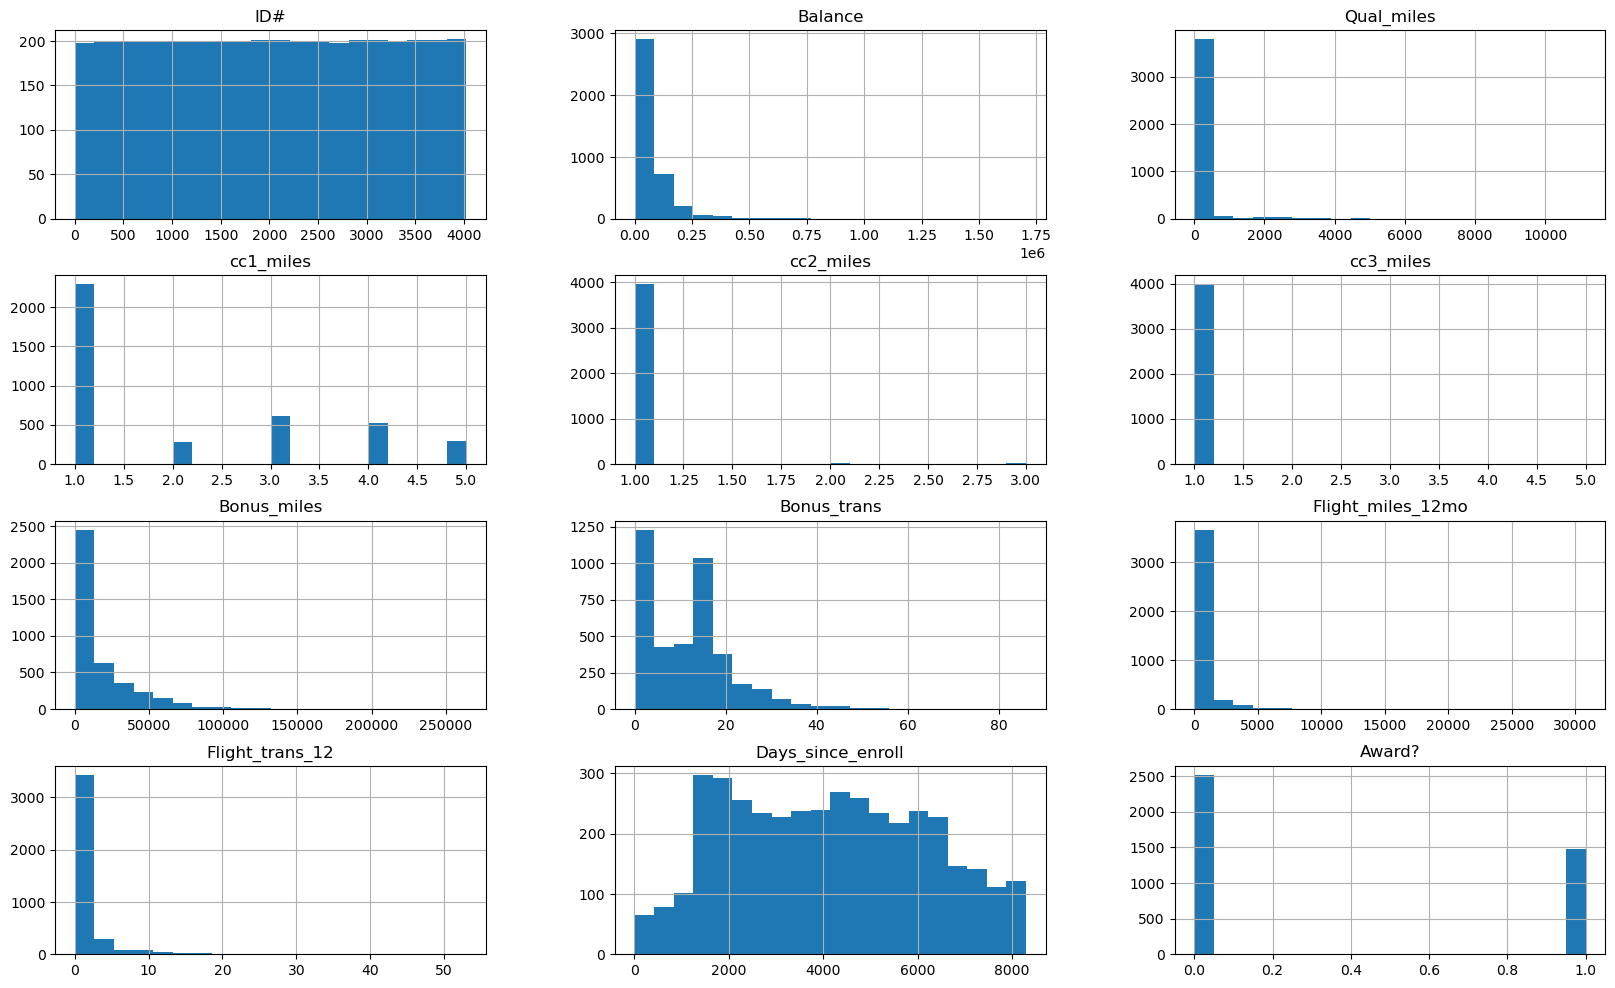

In [94]:
figure=(20,12)
data.hist(bins=20,figsize=figure)
map.show()

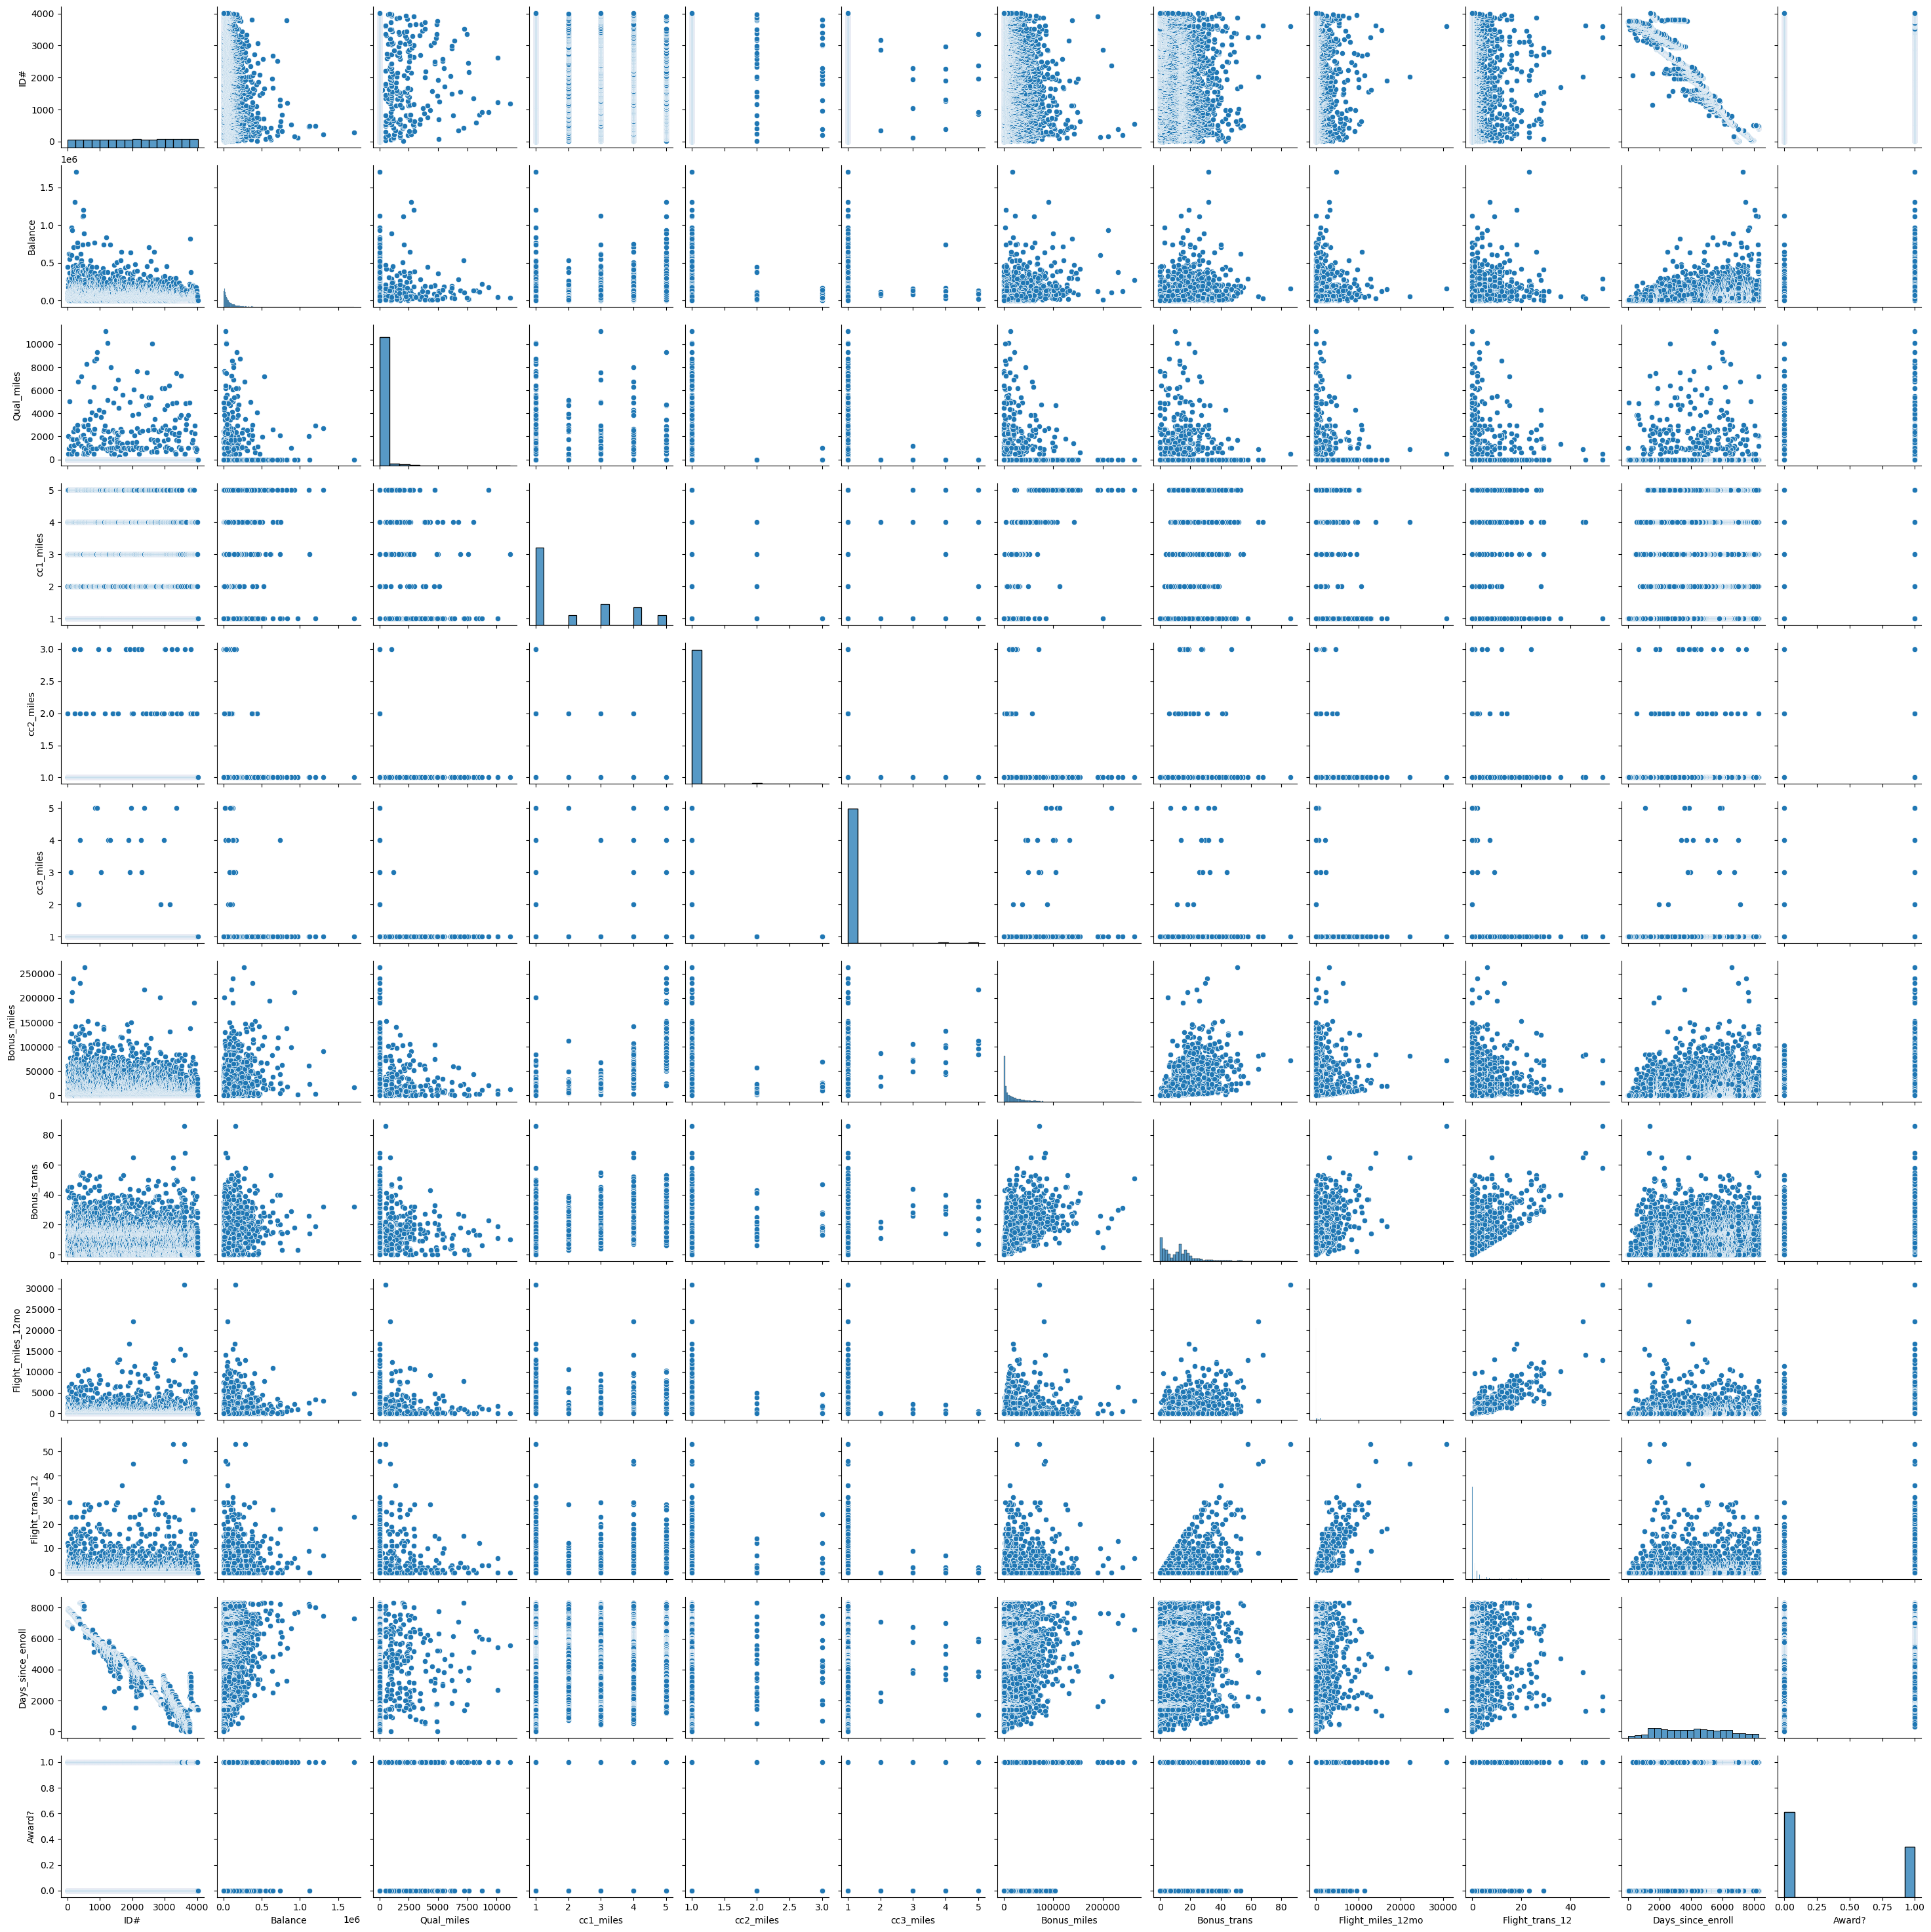

In [96]:
sn.pairplot(data)

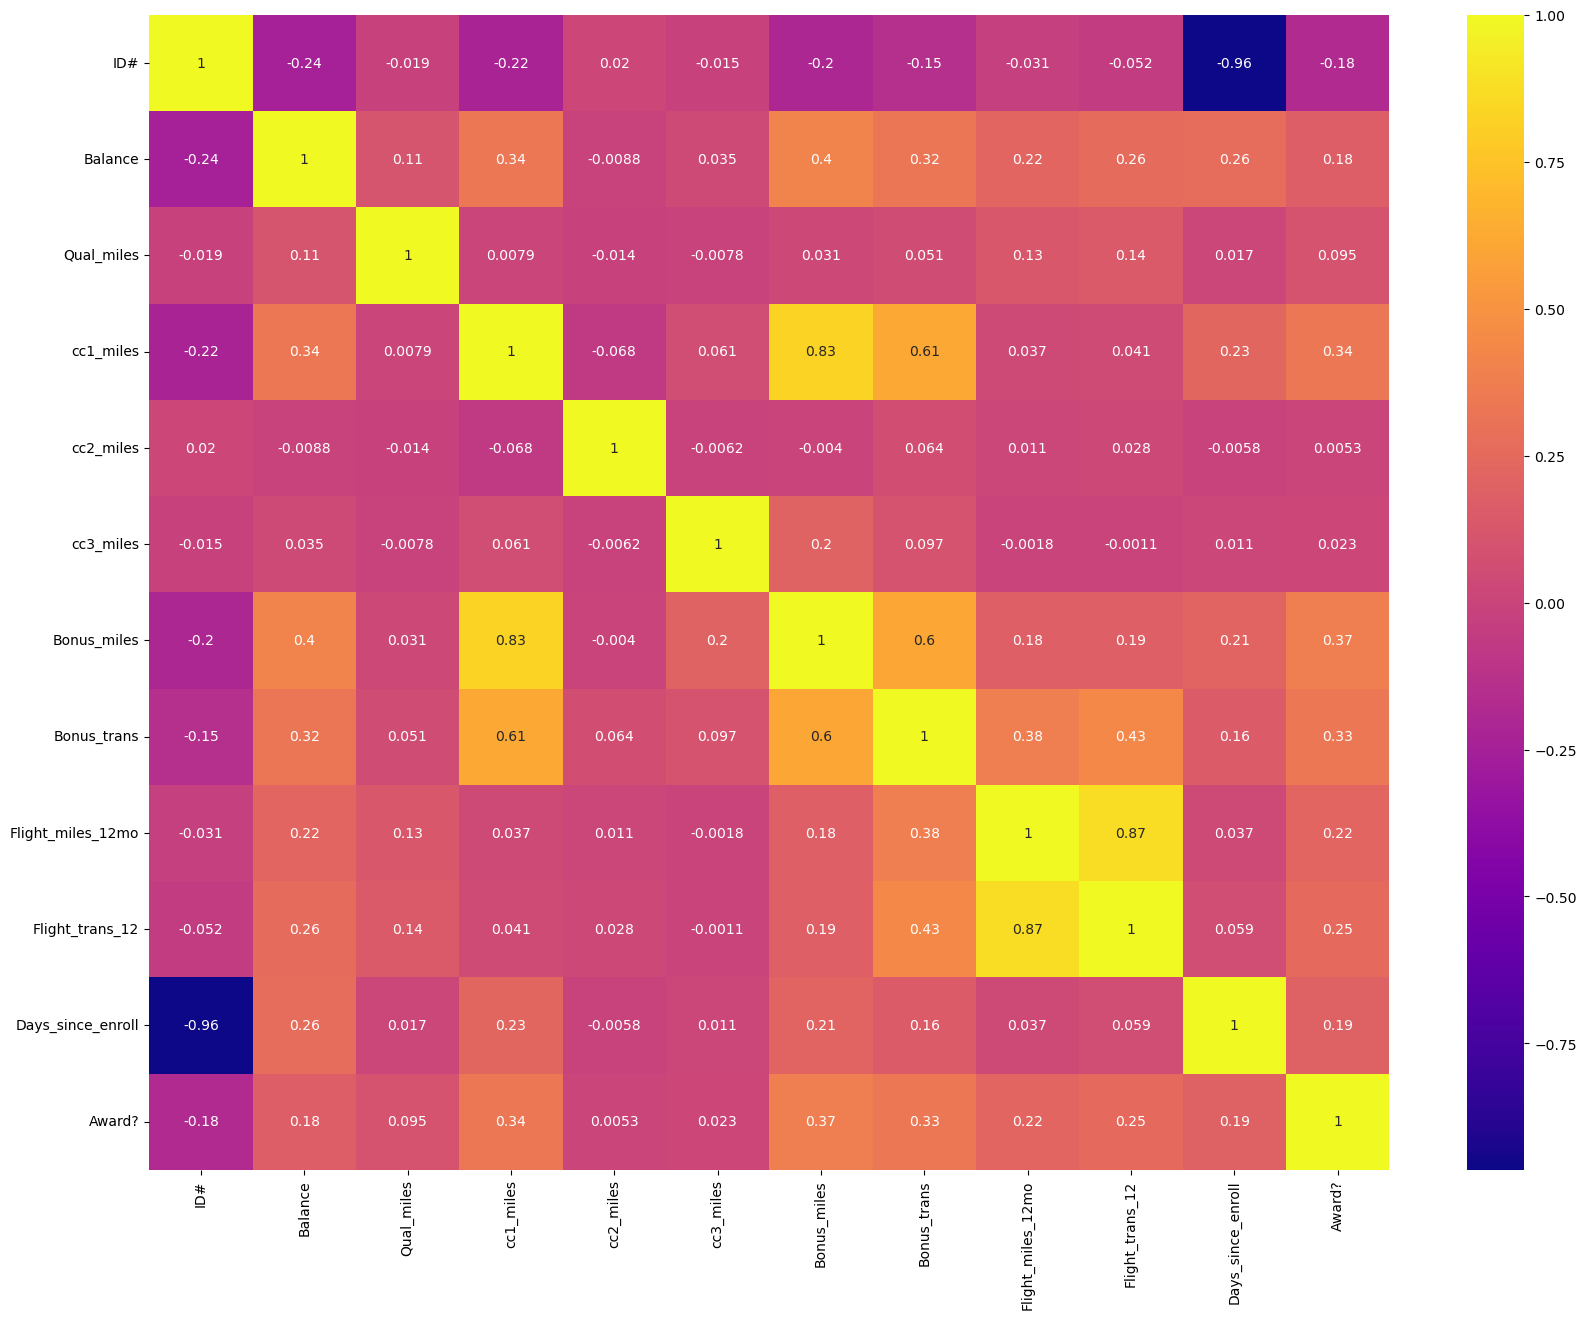

In [116]:
corr=data.corr()
map.figure(figsize=(20,15))
sn.heatmap(corr,annot=True,cmap='plasma')
map.show()

## Task-2:Implementing Clustering Algorithms:

### k-means clustering

In [144]:
#finding best k value
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i).fit(standardized_data)
    wcss.append(kmeans.inertia_)
wcss

[36300.0,
 27866.009529063085,
 23394.32975966279,
 19963.66450589266,
 18422.054908456983,
 15808.54020918432,
 14843.29326518768,
 14206.316681417818,
 13283.83416303233,
 12815.92980282185]

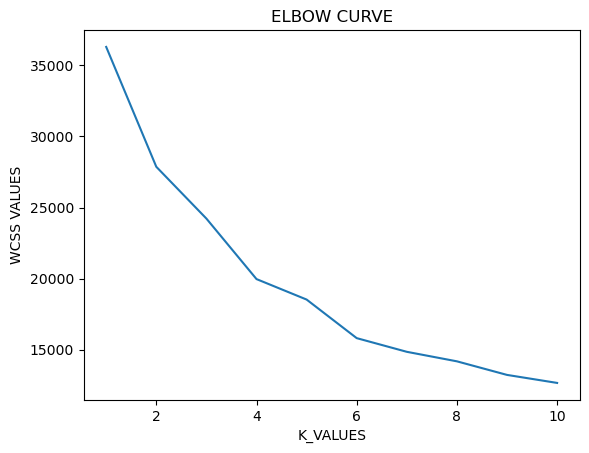

In [140]:
map.plot(range(1,11),wcss)
map.xlabel('K_VALUES')
map.ylabel('WCSS VALUES')
map.title('ELBOW CURVE')
map.show()

In [170]:
#from elbow curve k=4 or k=5 is the best option
km=KMeans(n_clusters=4,random_state=42)
kmeans_clustering=km.fit(standardized_data)
kmeans_clustering

KMeans(n_clusters=4, random_state=42)

In [192]:
kmeans_label=kmeans_clustering.labels_
kmeans_labels=pd.Series(kmeans_label, name='KMEANS LABELS')
kmeans_labels

0       0
1       0
2       0
3       0
4       1
       ..
3625    3
3626    3
3627    3
3628    3
3629    3
Name: KMEANS LABELS, Length: 3630, dtype: int32

###  HIERARCHICAL CLUSTERING


Text(0.5, 1.0, 'DENDOGRAM')

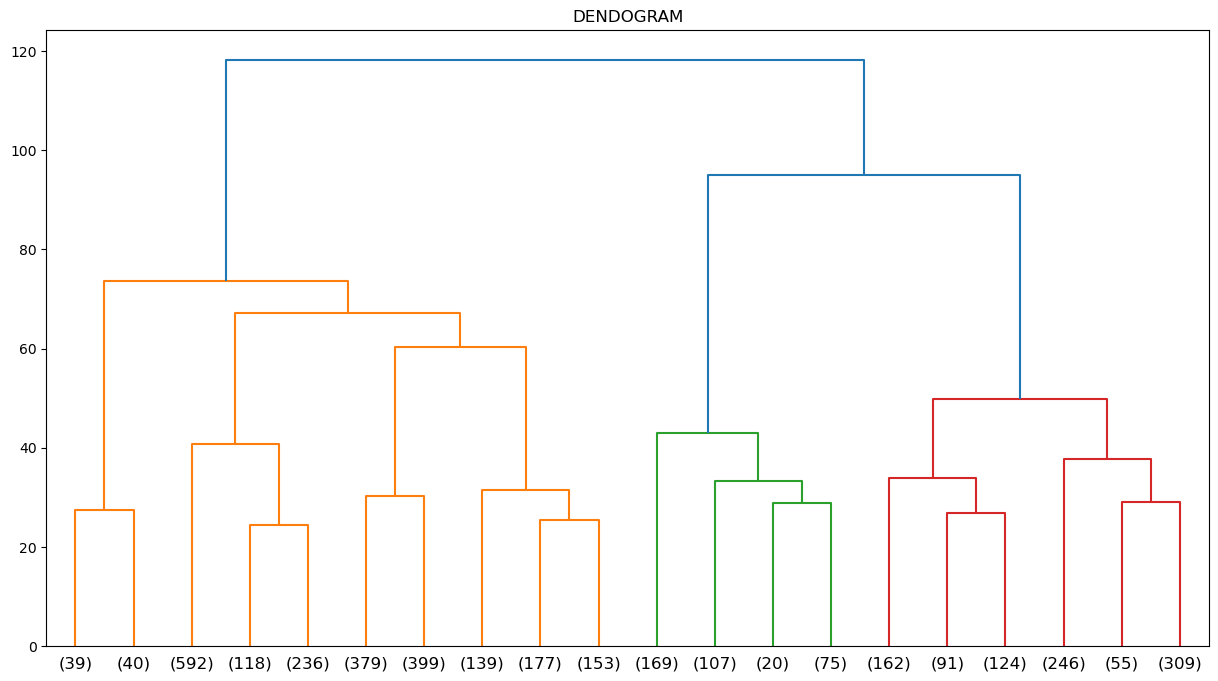

In [245]:
map.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(standardized_data, method='ward'),truncate_mode='lastp',p=20)
map.title('DENDOGRAM')

In [255]:
hierarchical_clusters=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='complete')
hierarchical_clusters.fit(standardized_data)
labels=hierarchical_clusters.labels_
labels

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

### DBSCAN CLUSTERING

In [274]:
#to find epsilon value
nn=NearestNeighbors(n_neighbors=10)
nn.fit(standardized_data)
distances,idices=nn.kneighbors(standardized_data)
distances=nm.sort(distances,axis=0)
distances=distances[:,1]

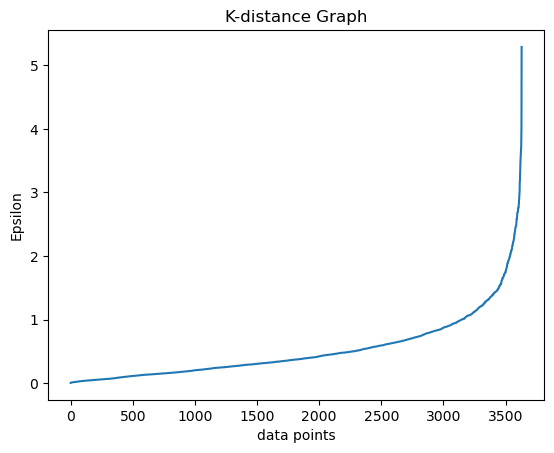

In [278]:
map.plot(distances)
map.title('K-distance Graph')
map.xlabel('data points')
map.ylabel('Epsilon')
map.show()

In [282]:
dbscan=DBSCAN(eps=2,min_samples=9)
dbscan_labels=dbscan.fit_predict(standardized_data)
dbscan_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Task-3:Visualization:

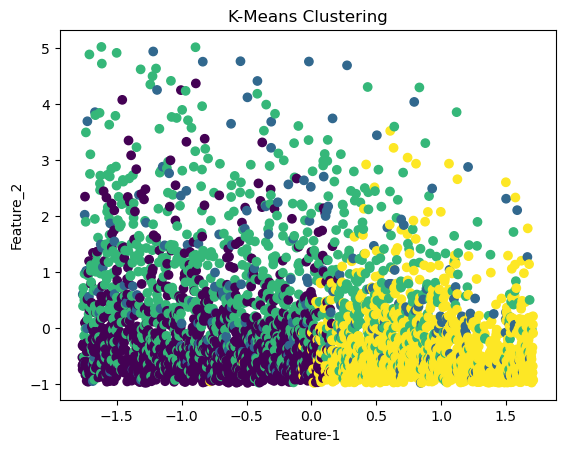

In [287]:
#Visualization for k means clustering
map.scatter(standardized_data[:,0],standardized_data[:,1],c=kmeans_labels,cmap='viridis')
map.title('K-Means Clustering')
map.xlabel('Feature-1')
map.ylabel('Feature_2')
map.show()

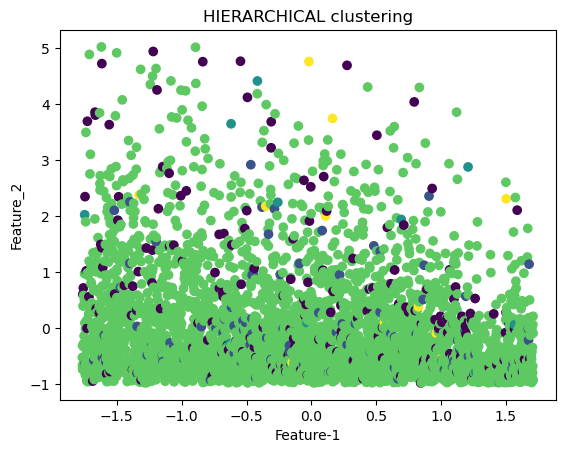

In [292]:
#Visualization for HIERARCHICAL clustering
map.scatter(standardized_data[:,0],standardized_data[:,1],c=labels,cmap='viridis')
map.title('HIERARCHICAL clustering')
map.xlabel('Feature-1')
map.ylabel('Feature_2')
map.show()

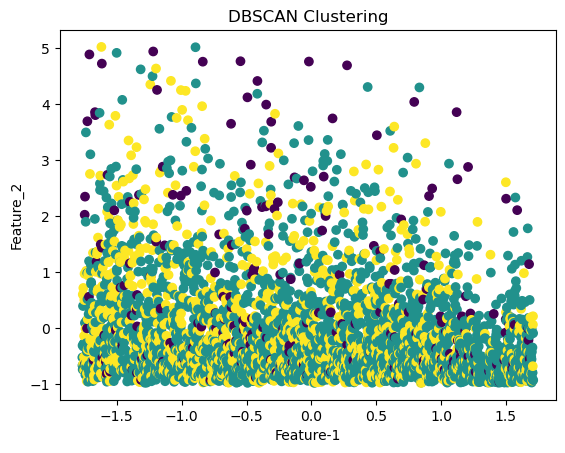

In [296]:
#Visualization for DBSCAN clustering
map.scatter(standardized_data[:,0],standardized_data[:,1],c=dbscan_labels,cmap='viridis')
map.title('DBSCAN Clustering')
map.xlabel('Feature-1')
map.ylabel('Feature_2')
map.show()

### Task-4:Evaluation and Performance Metrics:

In [313]:
# Silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(standardized_data, kmeans_labels)
hierarchical_silhouette_score = silhouette_score(standardized_data, labels)
dbscan_silhouette_score = silhouette_score(standardized_data, dbscan_labels)

print("K-Means Silhouette Score       :", kmeans_silhouette_score)
print("Hierarchical Silhouette Score  :", hierarchical_silhouette_score)
print("DBSCAN Silhouette Score        :", dbscan_silhouette_score)

K-Means Silhouette Score       : 0.24232976964087152
Hierarchical Silhouette Score  : 0.4004184176214267
DBSCAN Silhouette Score        : 0.21563653958580276
